### Set Up Qiskit

https://docs.quantum.ibm.com/start/install
Commmands for installing Qiskit to your local computer:

pip install qiskit

pip install qiskit[visualization]

pip install qiskit-ibm-runtime

pip install qiskit-aer




Alternatively, you can use qBraid, whihc is an online editor: https://www.qbraid.com/


### Build a Quantum Circuit

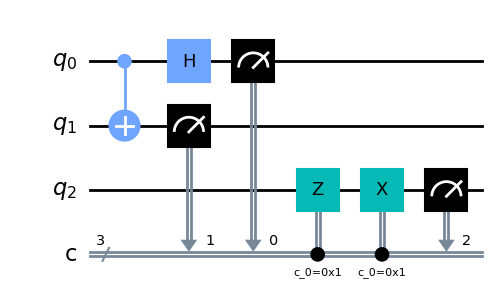

In [24]:
from qiskit import QuantumCircuit
 
# Create a new circuit with 2 qubits (first argument) and 2 classical
# bits (second argument)
qc = QuantumCircuit(3,3)
 
# qc.h(1)
# qc.cx(1,2)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Peform measurement on qubit 1 and store the measurement result to classical bit 1
qc.measure(0,0)
qc.z(2).c_if(0,1)
qc.measure(1,1)
qc.x(2).c_if(0,1)

qc.measure(2, 2)

# Perform measurement on all the qubits
# qc.measure_all()

# Visualzie the quantum circuit
qc.draw("mpl",style="clifford")

### Simulate the Circuit and Visualize the Measurement Results

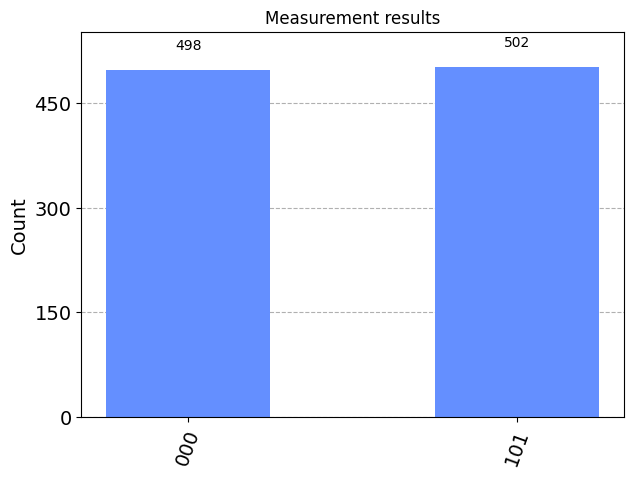

In [25]:
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram

# Get an Aer simulator and transpile the circuit
simulator = Aer.get_backend('aer_simulator')
qc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc, shots =1000).result()
counts = result.get_counts(qc)

# Plot the measurement results
plot_histogram(counts, title='Measurement results')

